<a href="https://colab.research.google.com/github/PedroLemosMariano/Idade-como-Fator-de-Mortalidade-por-Neoplastia-Maligna-do-Est-mago/blob/main/Neoplastia_Maligna_no_Est%C3%B4mago_6968.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BIBLIOTECAS NECESSÁRIAS

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/PROJETO_2_IA/DATASET - NME/2023 - NME - adaptado.csv'

df = pd.read_csv(file_path, encoding='latin1', delimiter='\t')

print("Visualização inicial dos dados:")
print(df.head())

print(df.describe())

print(df.info())

Visualização inicial dos dados:
  REGIAO;-1;5~14;15~24;25~34;35~44;45~54;55~64;65~74;75+;Idade ignorada;Total
0           Norte;-;-;6;37;83;191;296;366;340;-;1319                         
1      Nordeste;1;-;9;88;239;454;810;969;1173;-;3743                         
2    Sudeste;-;1;13;85;294;644;1234;1834;2245;4;6354                         
3            Sul;-;-;1;32;114;239;538;757;835;-;2516                         
4     Centro-Oeste;-;-;2;18;55;102;188;255;272;-;892                         
       REGIAO;-1;5~14;15~24;25~34;35~44;45~54;55~64;65~74;75+;Idade ignorada;Total
count                                                   7                         
unique                                                  7                         
top              Norte;-;-;6;37;83;191;296;366;340;-;1319                         
freq                                                    1                         
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (tot

In [ ]:
diretorio_txt = "/content/drive/MyDrive/PROJETO_2_IA/DATASET - NME"
dataframes = []

for arquivo in os.listdir(diretorio_txt):
    if arquivo.endswith(".txt"):
        caminho_arquivo = os.path.join(diretorio_txt, arquivo)

        ano = os.path.splitext(arquivo)[0]

        try:
            df = pd.read_csv(
                caminho_arquivo,
                sep=";",
                encoding="utf-8",
                engine="python",
                na_values="-"
            )
        except UnicodeDecodeError:
            # Tentar outra codificação se UTF-8 falhar
            df = pd.read_csv(
                caminho_arquivo,
                sep=";",
                encoding="latin1",
                engine="python",
                na_values="-"
            )

        df["Ano"] = ano

        dataframes.append(df)

df_concatenado = pd.concat(dataframes, ignore_index=True)

print(df_concatenado.head())

# Salvar o resultado em um arquivo CSV se necessário
df_concatenado.to_csv("dados_concatenados.csv", index=False, sep=";", encoding="utf-8")


                  Região  5 a 14 anos  15 a 24 anos  25 a 34 anos  \
0         1 Região Norte          NaN             5            35   
1      2 Região Nordeste          2.0            24            72   
2       3 Região Sudeste          NaN            13            85   
3           4 Região Sul          NaN             5            33   
4  5 Região Centro-Oeste          NaN             3            19   

   35 a 44 anos  45 a 54 anos  55 a 64 anos  65 a 74 anos  75 anos e mais  \
0            81           143           296           346             311   
1           213           444           687           861            1025   
2           282           756          1478          1869            2267   
3           108           284           542           691             804   
4            60           110           217           229             250   

   Idade ignorada  Total   Ano  Menor 1 ano  1 a 4 anos  
0             NaN   1217  2016          NaN         NaN  
1     

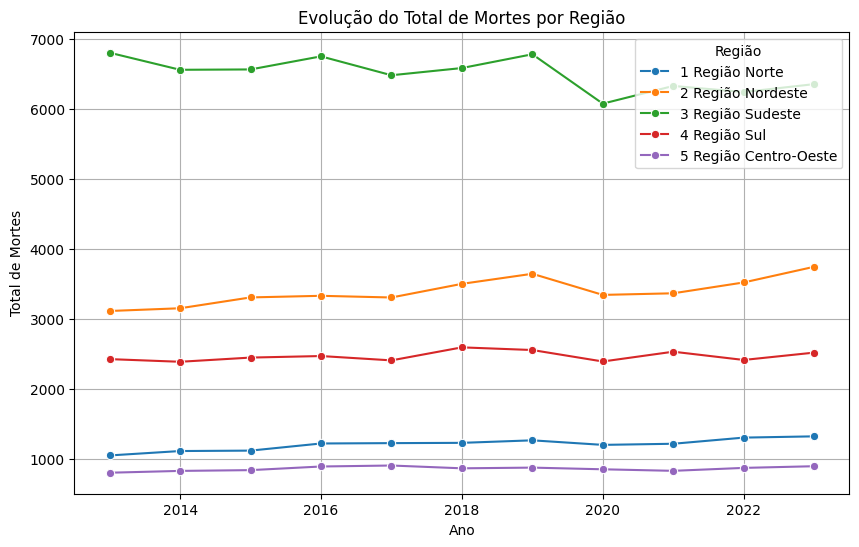

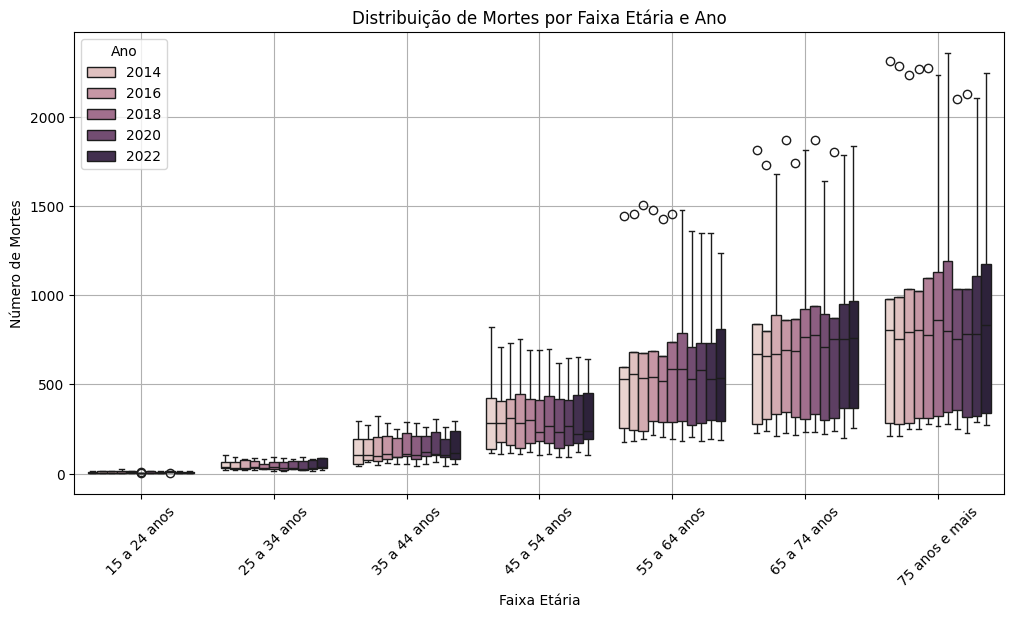

<ipython-input-101-73e6c6ed0e49>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_2023, x="Região", y="Total", palette="viridis")


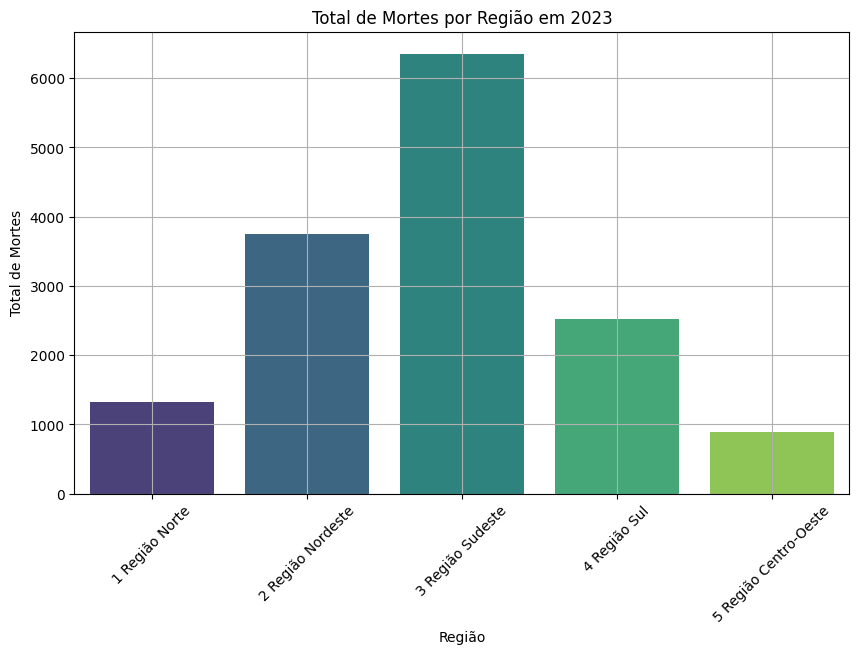

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/PROJETO_2_IA/DATASET - NME/dados_concatenados.csv", sep=";")

dados["Ano"] = dados["Ano"].astype(int)

dados = dados[dados["Região"] != "Total"]

# Gráfico 1: Evolução do total de mortes por ano
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados, x="Ano", y="Total", hue="Região", marker="o")
plt.title("Evolução do Total de Mortes por Região")
plt.xlabel("Ano")
plt.ylabel("Total de Mortes")
plt.legend(title="Região")
plt.grid()
plt.show()

# Gráfico 2: Distribuição de mortes por faixa etária
faixas_etarias = ["15 a 24 anos", "25 a 34 anos", "35 a 44 anos", "45 a 54 anos",
                  "55 a 64 anos", "65 a 74 anos", "75 anos e mais"]
dados_melt = dados.melt(id_vars=["Região", "Ano"], value_vars=faixas_etarias,
                        var_name="Faixa Etária", value_name="Mortes")

plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_melt, x="Faixa Etária", y="Mortes", hue="Ano")
plt.title("Distribuição de Mortes por Faixa Etária e Ano")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Mortes")
plt.xticks(rotation=45)
plt.legend(title="Ano")
plt.grid()
plt.show()

# Gráfico 3: Comparação de mortes entre regiões em um ano específico (exemplo: 2023)
ano_especifico = 2023
dados_2023 = dados[dados["Ano"] == ano_especifico]

plt.figure(figsize=(10, 6))
sns.barplot(data=dados_2023, x="Região", y="Total", palette="viridis")
plt.title(f"Total de Mortes por Região em {ano_especifico}")
plt.xlabel("Região")
plt.ylabel("Total de Mortes")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Epoch 10/100, Loss: nan, Val Loss: 0.5143
Epoch 20/100, Loss: nan, Val Loss: 0.5143
Epoch 30/100, Loss: nan, Val Loss: 0.5143
Epoch 40/100, Loss: nan, Val Loss: 0.5143
Epoch 50/100, Loss: nan, Val Loss: 0.5143
Epoch 60/100, Loss: nan, Val Loss: 0.5143
Epoch 70/100, Loss: nan, Val Loss: 0.5143
Epoch 80/100, Loss: nan, Val Loss: 0.5143
Epoch 90/100, Loss: nan, Val Loss: 0.5143
Epoch 100/100, Loss: nan, Val Loss: 0.5143


<ipython-input-123-a94dc59353a3>:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_colors)  # Escolha um colormap apropriado (ex: tab20)


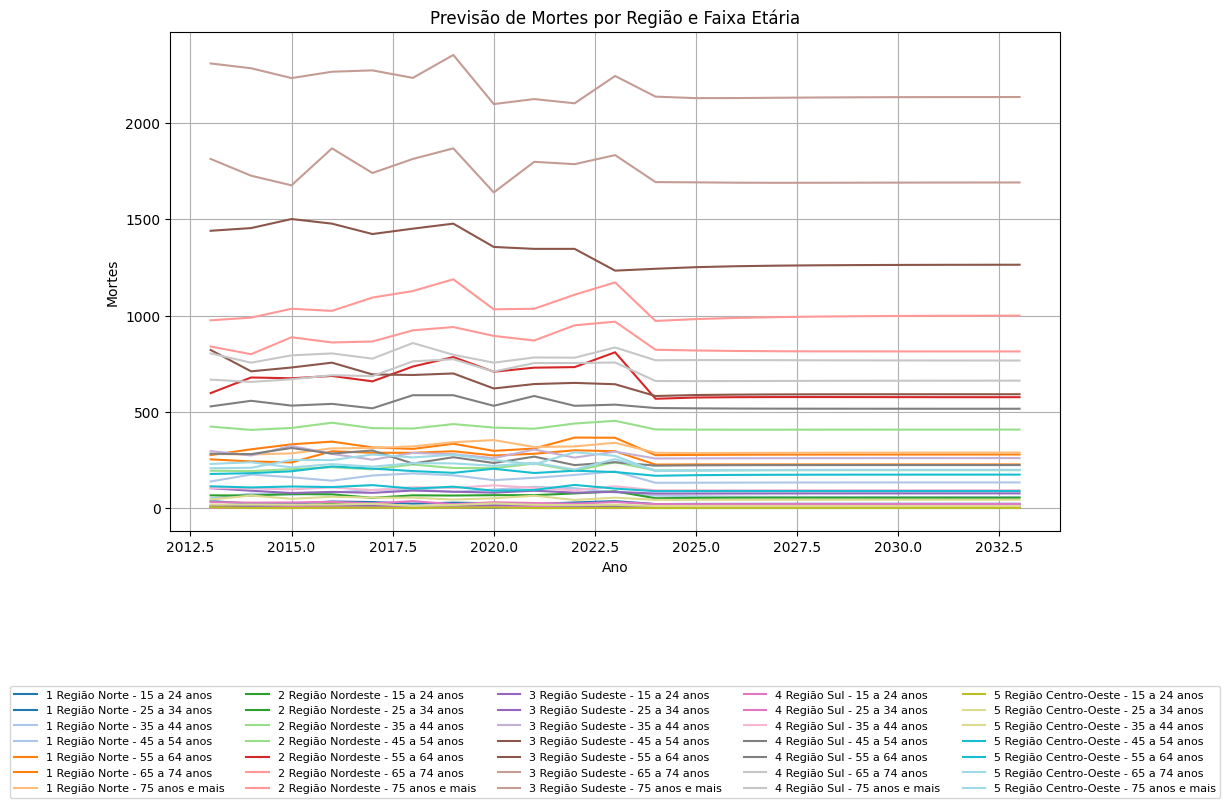

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

dados = pd.read_csv("/content/drive/MyDrive/PROJETO_2_IA/DATASET - NME/dados_concatenados.csv", sep=";")  # Substitua pelo nome correto do arquivo
dados = dados[dados["Região"] != "Total"]  # Remover linha "Total"

dados["Ano"] = dados["Ano"].astype(int)

# Processamento de dados
faixas_etarias = ["15 a 24 anos", "25 a 34 anos", "35 a 44 anos", "45 a 54 anos",
                  "55 a 64 anos", "65 a 74 anos", "75 anos e mais"]
dataset = dados.melt(id_vars=["Região", "Ano"], value_vars=faixas_etarias,
                     var_name="Faixa Etária", value_name="Mortes")

dataset["Região_Faixa"] = dataset["Região"] + " - " + dataset["Faixa Etária"]

pivot_data = dataset.pivot_table(index="Ano", columns="Região_Faixa", values="Mortes").fillna(0)

# Normalizar dados
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(pivot_data)

# Criar sequências
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    if len(X) == 0:
        print("Erro: Não há dados suficientes para criar sequências.")
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(data_scaled, seq_length)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Dividir dados em treino e validação
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Modelo LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

# Configurações do modelo
input_size = X.shape[2]
hidden_size = 50
output_size = y.shape[1]
model = LSTMModel(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Treinar o modelo
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        model.eval()
        val_output = model(X_val)
        val_loss = criterion(val_output, y_val)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Previsão para os próximos 10 anos
model.eval()
future_years = 10
predictions = []

last_sequence = X[-1].detach().numpy()
for _ in range(future_years):
    input_seq = torch.tensor(last_sequence[np.newaxis, :, :], dtype=torch.float32)
    pred = model(input_seq).detach().numpy()
    predictions.append(pred[0])
    last_sequence = np.vstack([last_sequence[1:], pred])

predictions = scaler.inverse_transform(np.array(predictions))

future_df = pd.DataFrame(predictions, columns=pivot_data.columns, index=range(2024, 2024 + future_years))

# Combinar dados históricos e previsões
combined_df = pd.concat([pivot_data, future_df])

# Plotar resultados
plt.figure(figsize=(12, 10))

# Gerar um mapa de cores com base no número de colunas
num_colors = len(pivot_data.columns)
colors = cm.get_cmap('tab20', num_colors)  # Escolha um colormap apropriado (ex: tab20)

# Plotar todas as colunas com cores distintas
for i, column in enumerate(pivot_data.columns):
    plt.plot(combined_df.index, combined_df[column], label=column, color=colors(i))

# Títulos e legendas
plt.title("Previsão de Mortes por Região e Faixa Etária")
plt.xlabel("Ano")
plt.ylabel("Mortes")

# Posicionar a legenda abaixo do gráfico
plt.legend(bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=5, fontsize=8)  # Ajuste o número de colunas conforme necessário
plt.grid()

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Reservar espaço para a legenda

# Exibir o gráfico
plt.show()


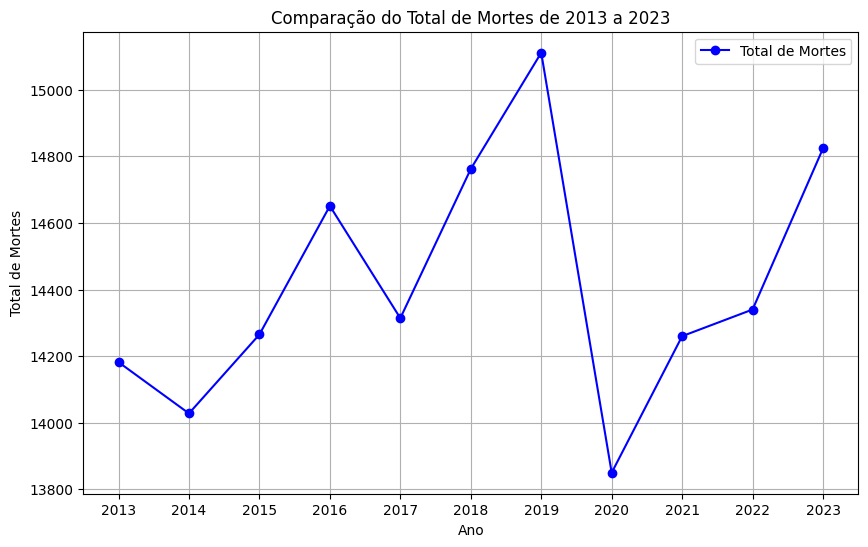

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/PROJETO_2_IA/DATASET - NME/dados_concatenados.csv", sep=";")
dados = dados[dados["Região"] != "Total"]

# Filtrar os dados para os anos de interesse (2020 a 2023)
dados_anos = dados[dados["Ano"].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])]

# Somar o total de mortes por ano (coluna "Total")
total_mortes_ano = dados_anos.groupby("Ano")["Total"].sum()

# Plotar o gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(total_mortes_ano.index, total_mortes_ano.values, marker='o', color='b', label='Total de Mortes')
plt.title("Comparação do Total de Mortes de 2013 a 2023")
plt.xlabel("Ano")
plt.ylabel("Total de Mortes")
plt.xticks(total_mortes_ano.index)  # Marcar todos os anos no eixo X
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1400x800 with 0 Axes>

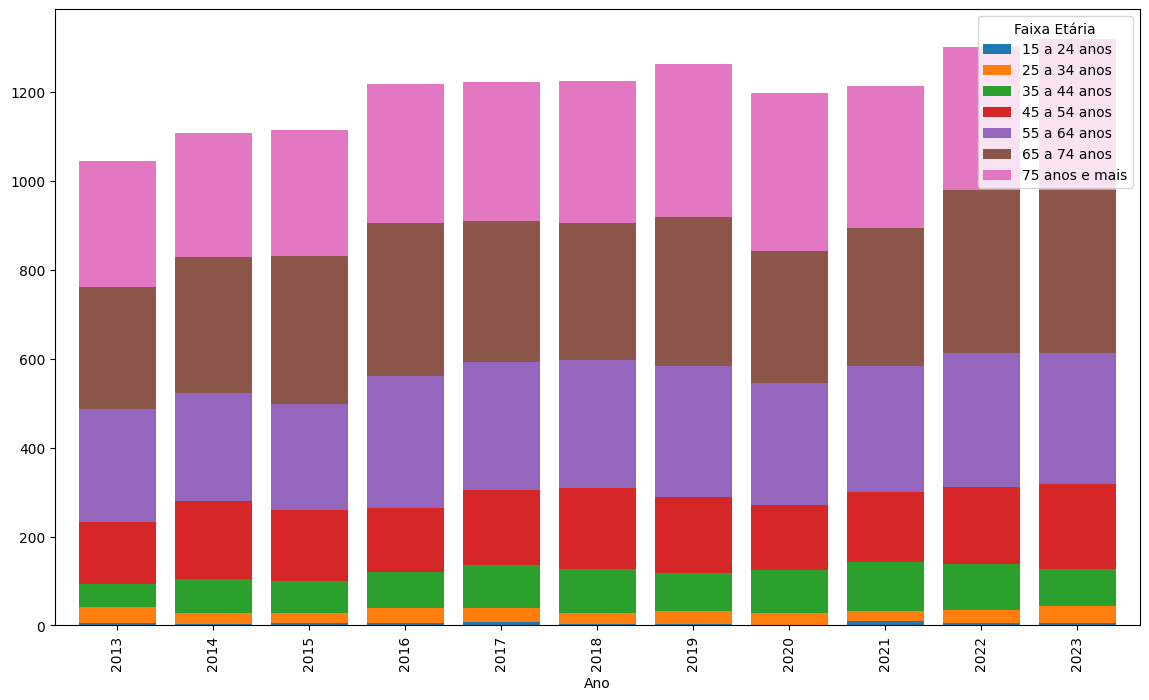

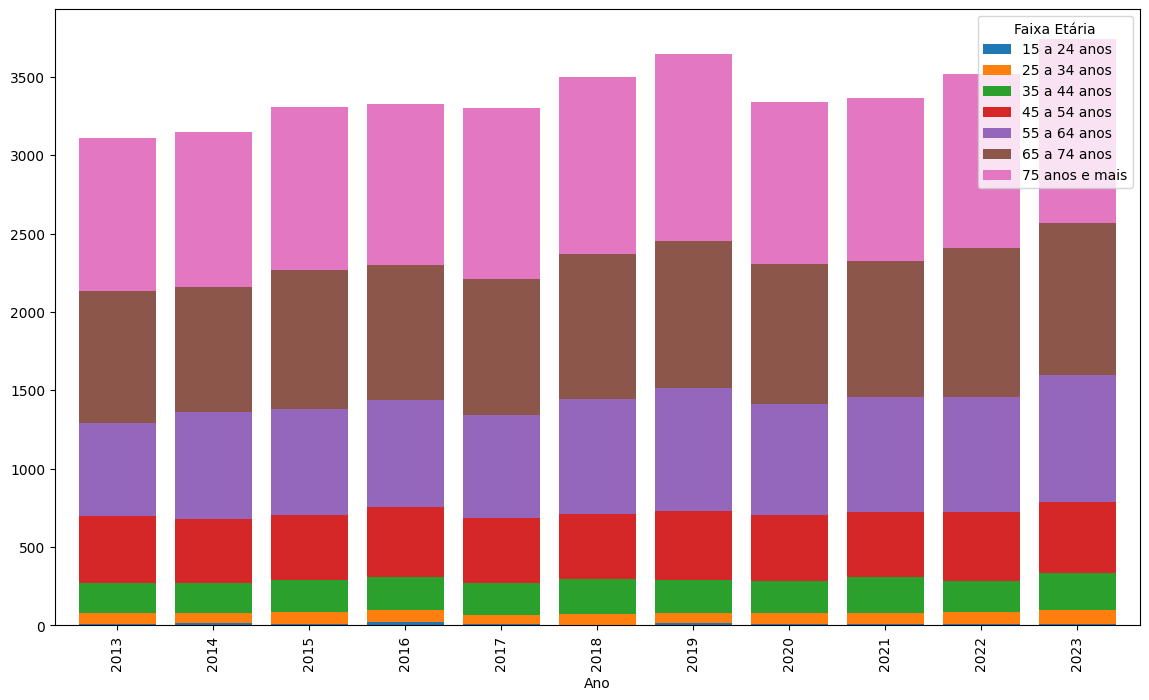

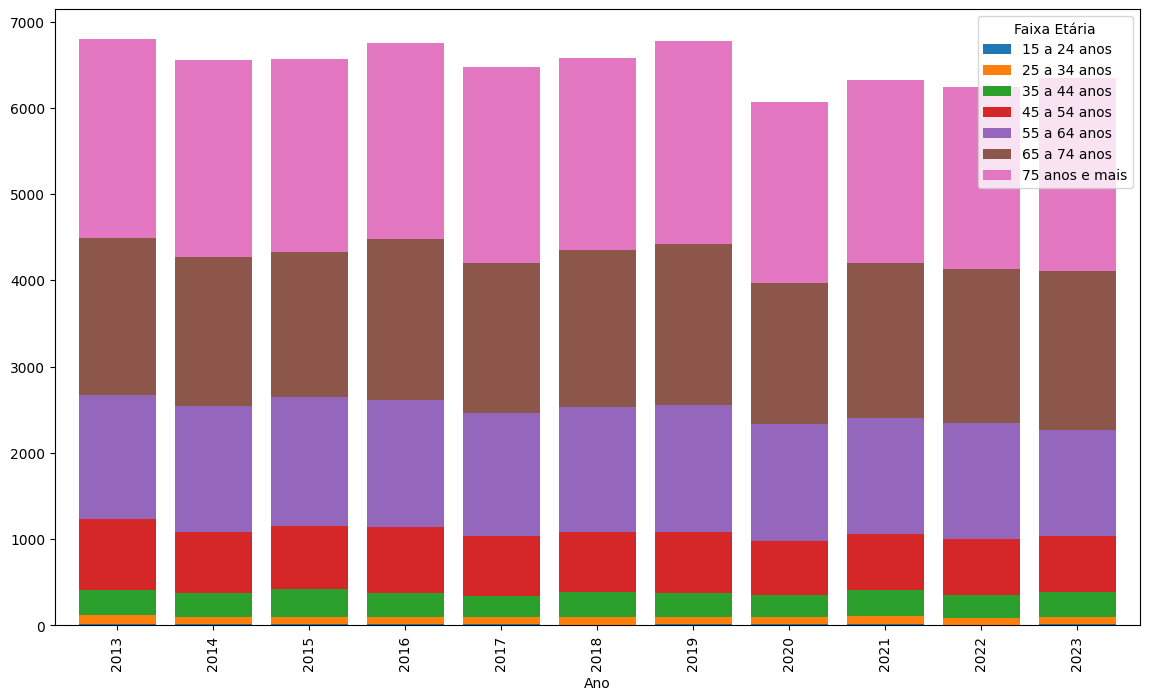

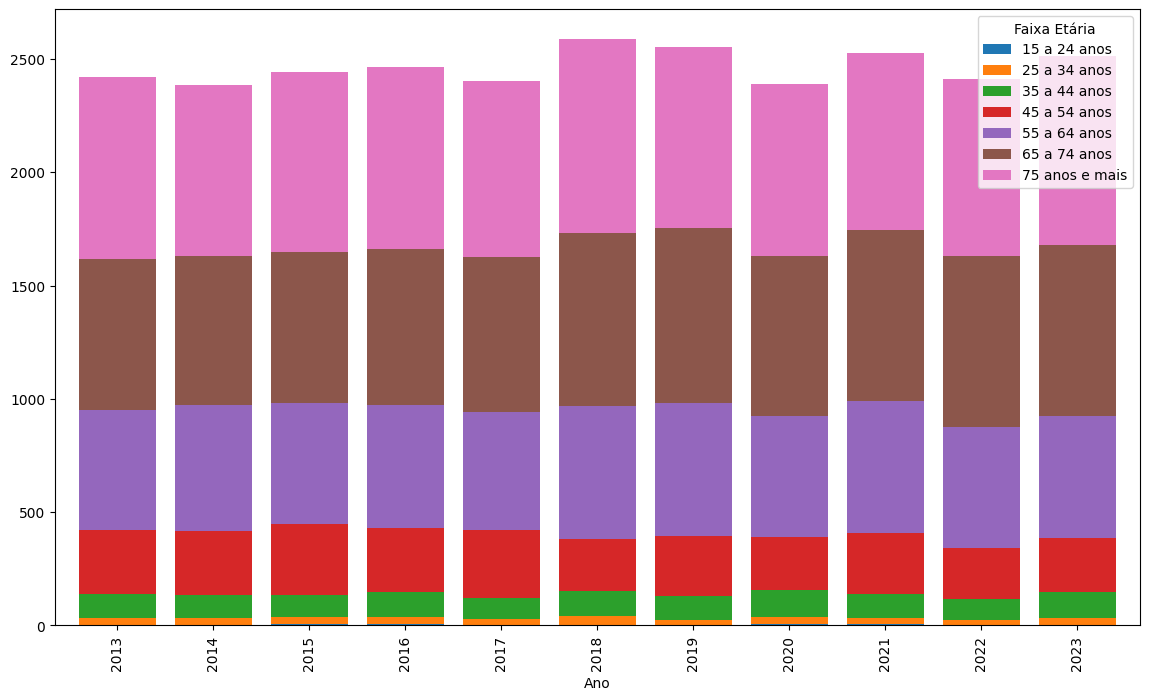

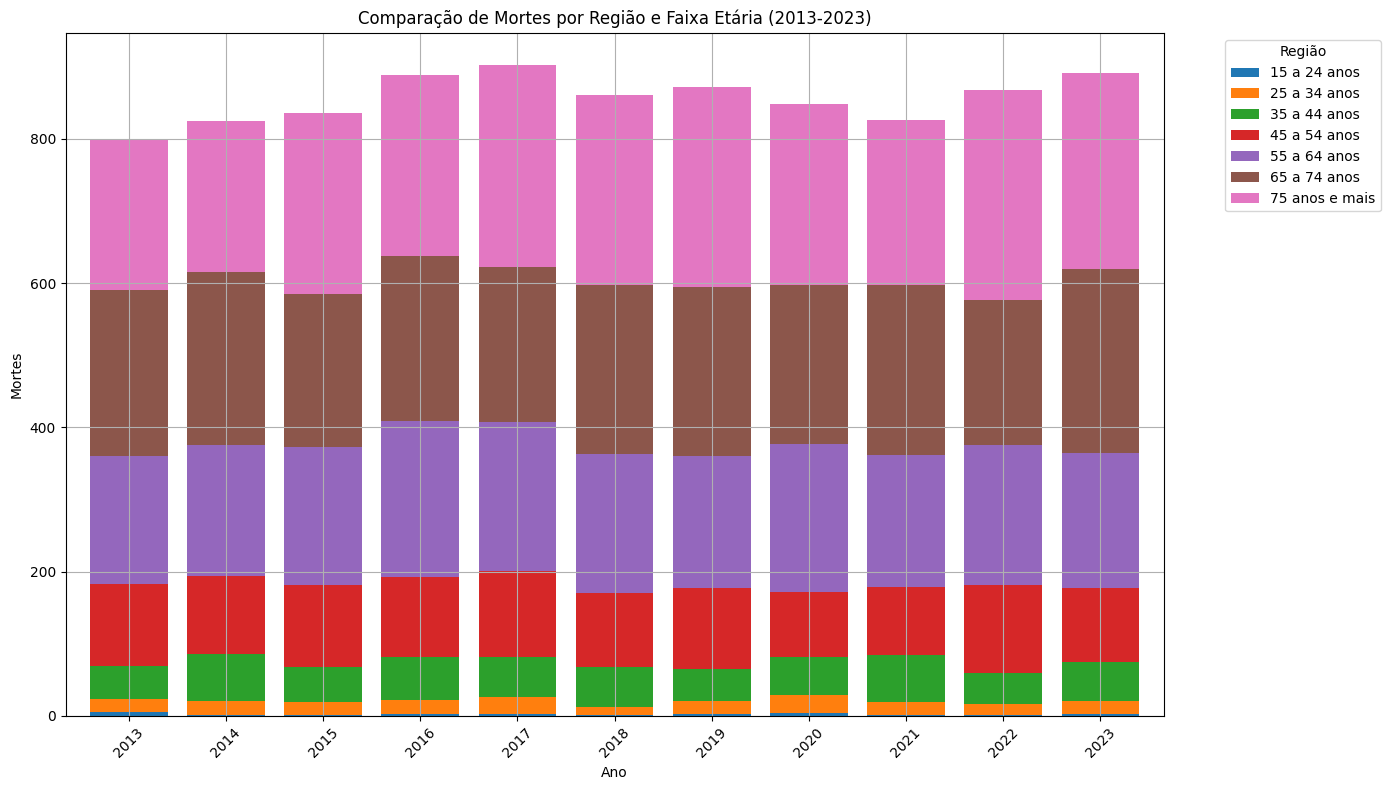

In [ ]:
dados = pd.read_csv("dados_concatenados.csv", sep=";")
dados = dados[dados["Região"] != "Total"]

faixas_etarias = ["15 a 24 anos", "25 a 34 anos", "35 a 44 anos", "45 a 54 anos",
                  "55 a 64 anos", "65 a 74 anos", "75 anos e mais"]
dataset = dados.melt(id_vars=["Região", "Ano"], value_vars=faixas_etarias,
                     var_name="Faixa Etária", value_name="Mortes")

pivot_data = dataset.pivot_table(index=["Ano", "Região"], columns="Faixa Etária", values="Mortes").fillna(0)

# Plotar as mortes por região e faixa etária
plt.figure(figsize=(14, 8))

for regiao in dados["Região"].unique():
    region_data = pivot_data.xs(key=regiao, level="Região")
    region_data.plot(kind="bar", stacked=True, width=0.8, figsize=(14, 8), label=regiao)

plt.title("Comparação de Mortes por Região e Faixa Etária (2013-2023)")
plt.xlabel("Ano")
plt.ylabel("Mortes")
plt.legend(title="Região", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Upload do dataset e visualização